# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
# Checking the number of mice.
total_mice=len(df['Mouse ID'].unique())
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
copycat_mice = df[df.duplicated(["Mouse ID", "Timepoint"], keep=False)]
#copycat = copycat_mice["Mouse ID"].unique()
copycat_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
copycat_mice.loc[copycat_mice["Mouse ID"]=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
df2 = df[df["Mouse ID"]!="g989"].copy()
df2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(df2['Mouse ID'].unique()))
df2.count()

248


Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, 
#standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary = df2.groupby("Drug Regimen")
mean = summary["Tumor Volume (mm3)"].mean()
median = summary["Tumor Volume (mm3)"].median()
var = summary["Tumor Volume (mm3)"].var()
std = summary["Tumor Volume (mm3)"].std()
sem = summary["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({
    "Mean Tumor Volume":mean,
    "Median Tumor Volume":median,
    "Tumor Volume Variane":var,
    "Tumor Volume Std. Dev":std,
    "Tumor Volume Std. Err.":sem
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variane,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table 
#of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen 
#(only one method is required in the solution)

# Using the aggregation method, produce the same summary 
#statistics in a single line


## Bar and Pie Charts

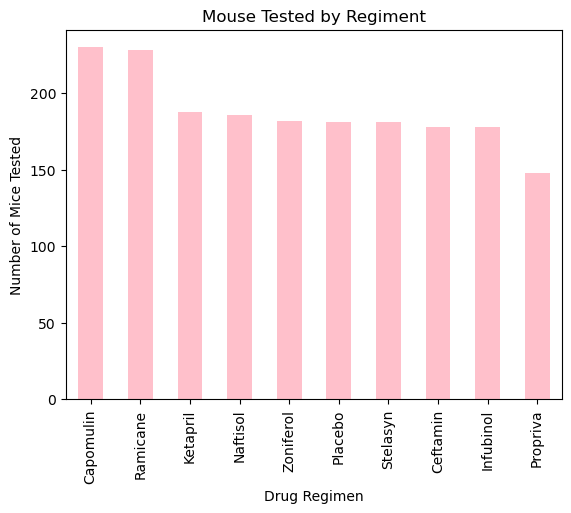

In [9]:
# Generate a bar plot showing the total number of rows 
#(Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = df2.groupby("Drug Regimen").size().sort_values(ascending=False)
drugreg_chart = counts.plot(kind = "bar", color = "pink")
drugreg_chart.set_title("Mouse Tested by Regiment")
drugreg_chart.set_xlabel("Drug Regimen")
drugreg_chart.set_ylabel('Number of Mice Tested')
plt.show()

Text(0, 0.5, 'Number of Mice')

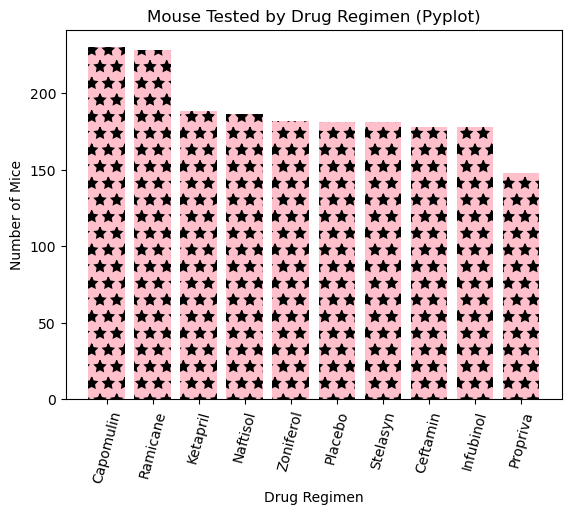

In [10]:
# Generate a bar plot showing the total number of rows 
#(Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts.index, counts.values, color="pink", hatch="*")
plt.title("Mouse Tested by Drug Regimen (Pyplot)")
plt.xticks(rotation=75) # they were horozontal before and i couldn't read it
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

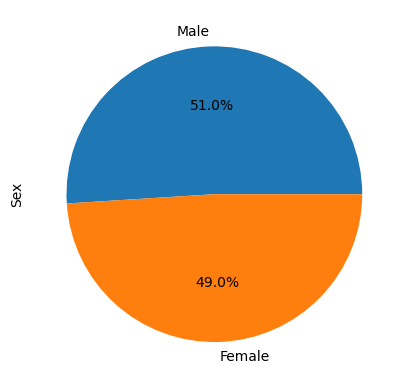

In [11]:
# Generate a pie plot showing the distribution of female versus male mice
#using Pandas

mf = (df2["Sex"].value_counts()/len(df2)*100)
mf = mf.round(0)


pie = mf.plot(kind='pie',autopct='%1.1f%%',labels=["Male", "Female"])

plt.show()

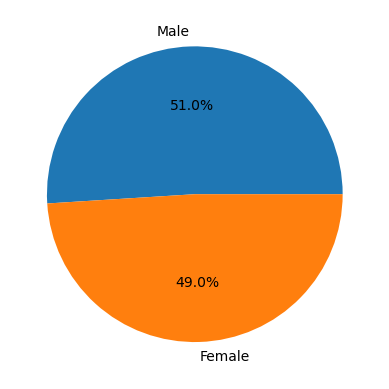

In [12]:
# Generate a pie plot showing the distribution of female versus male mice
#using pyplot
labels = ["Male", "Female"]
plt.pie(mf, labels=labels, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoints = df2.groupby(['Mouse ID'])['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume_df = pd.merge(greatest_timepoints, df2, how='left', on=['Mouse ID','Timepoint'])
final_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = list()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tumor_vols = final_volume_df.loc[final_volume_df['Drug Regimen'] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume.append(drug_tumor_vols)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_tumor_vols.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)

    upper_bound = upperq + (1.5 * iqr)


    outliers = drug_tumor_vols.loc[(drug_tumor_vols > upper_bound) | (drug_tumor_vols < lower_bound)]


    if len(outliers) > 0:
        print(f"{drug} outlier(s):")
        for o in outliers:
            print(f"{o}")
    else:
        print(f"{drug} has no outliers.")

Capomulin has no outliers.
Ramicane has no outliers.
Infubinol outlier(s):
36.3213458
Ceftamin has no outliers.


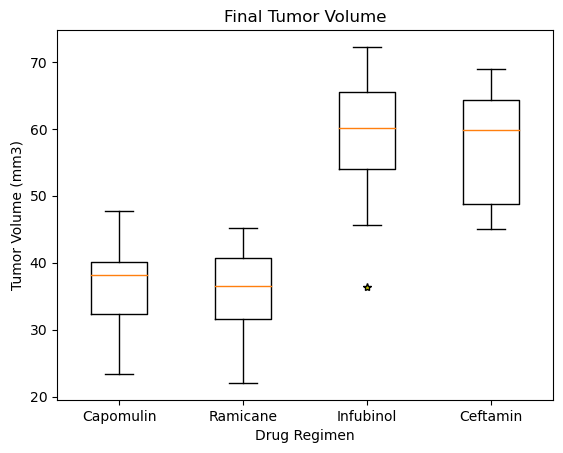

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box = dict(markerfacecolor='y', marker='*')
plt.boxplot(tumor_volume,flierprops=box)

plt.title('Final Tumor Volume')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(ticks=[1,2,3,4], labels = drugs)
plt.show()

## Line and Scatter Plots

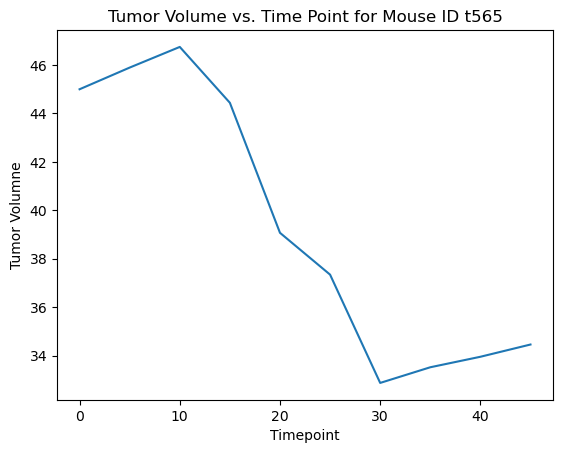

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_row = df2[df2['Drug Regimen'] == 'Capomulin'].sample()
mouse_id = mouse_row['Mouse ID'].values[0]
one_mouse_df = df2[df2['Mouse ID'] == mouse_id]

tumor_volumes = one_mouse_df['Tumor Volume (mm3)']
timepoints = one_mouse_df['Timepoint']


plt.plot(timepoints, tumor_volumes)
plt.ylabel('Tumor Volumne')
plt.xlabel('Timepoint')
plt.title(f'Tumor Volume vs. Time Point for Mouse ID {mouse_id}')
plt.show()

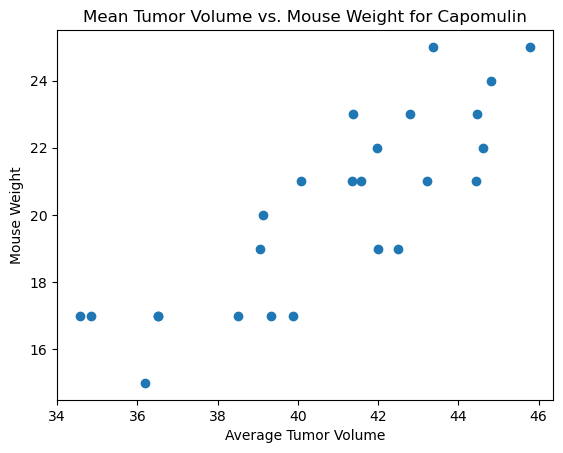

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_volume_df = df2[df2['Drug Regimen'] == 'Capomulin']

average_vols = Capomulin_volume_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
mouse_weights = Capomulin_volume_df.groupby(['Mouse ID'])['Weight (g)'].unique()
mouse_weights_list = []

for i in mouse_weights:
    mouse_weights_list.append(i[0])
    

plt.scatter(average_vols, mouse_weights)
plt.title('Mean Tumor Volume vs. Mouse Weight for Capomulin')
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')

plt.show()

## Correlation and Regression

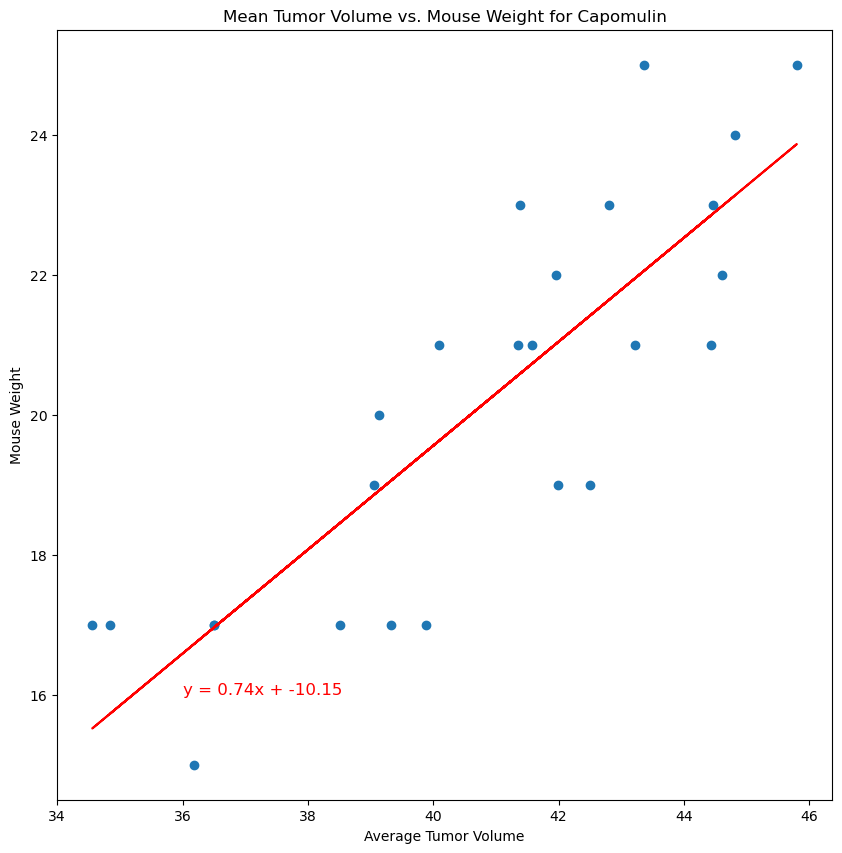

r-Value: 0.8419363424694721


In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_vols, mouse_weights_list)
regress_values = average_vols * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,10))

plt.scatter(average_vols, mouse_weights_list)
plt.title('Mean Tumor Volume vs. Mouse Weight for Capomulin')
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')
plt.plot(average_vols,regress_values,"r-")
plt.annotate(line_eq, (36,16),fontsize=12,color="red")

plt.show()
print(f"r-Value: {rvalue}")